In [ ]:
__version__ = "2.0"

# Scenario 4 - Losses

In [ ]:
# objective_functions.py
from objective_functions import objective_function_l as obj_fun

# parameters.py
from parameters import get_parameters_l as get_parameters

# Standard Libraries
from time import perf_counter
from functools import partial

# General
import numpy as np
import pandas as pd
import optuna

In [ ]:
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

In [ ]:
plt.style.use("bmh")
plt.rcParams['figure.figsize'] = (16,10/2)
plt.rcParams['axes.prop_cycle'] = plt.cycler(color=["rebeccapurple", "darkcyan", "deepskyblue", "olivedrab", "lawngreen", "darkkhaki", "darkgoldenrod", "saddlebrown", "firebrick", "deeppink"])

# Optimization

In [7]:
parameters, months = get_parameters()
results = []

start_time = perf_counter()

num_opt = 20
n_trials = 1000

for i in range(num_opt):
    
    study_name = f'Optimization-{i}-{n_trials}'
    
    start_opt_time  = perf_counter()
    
    study = optuna.create_study(study_name=study_name, direction='minimize')
    optuna.logging.set_verbosity(0)
    study.optimize(partial(obj_fun, parameters=parameters), n_trials=n_trials)
    
    print(f'{i} - {((perf_counter() - start_opt_time)/60):.3g} minutes')
    
    results.append(np.array([study.best_value, 
                             study.best_params['control_frequency'], 
                             study.best_params['initial_stock_level'], 
                             study.best_params['stock_floor'], 
                             study.best_params['stock_ceiling']]
                           ))
        
print(f'Total time: {((perf_counter() - start_time)/60):.3g} minutes')

4 - 4.7 minutes
5 - 4.21 minutes
6 - 5.47 minutes
7 - 4.16 minutes
8 - 4.16 minutes
9 - 5.49 minutes
10 - 4.47 minutes
11 - 4.31 minutes
12 - 4.15 minutes
13 - 4.4 minutes
14 - 4.29 minutes
15 - 4.17 minutes
16 - 5.4 minutes
17 - 4.23 minutes
18 - 4.42 minutes
19 - 4.23 minutes
Total time: 86.7 minutes


In [8]:
columns = ['Best Value','Control Frequency','Initial Stock Level','Stock Floor','Stock Ceiling']

try:
    df = pd.read_csv('scenario4',index_col=False)
except:
    df = pd.DataFrame(columns=columns)
    
results_df = pd.DataFrame(results, columns=columns)
results_df = results_df[results_df['Best Value'] < 0]

df = pd.concat([df, results_df])
df.reset_index(drop=True, inplace=True)
df = df.sort_values('Best Value', ascending=True).reset_index(drop=True)
df.to_csv('optimizations/scenario4',index=False)
df

,Best Value,Control Frequency,Initial Stock Level,Stock Floor,Stock Ceiling
0,-29753.424658,27.0,0.0,0.0,137.0
1,-29753.424658,30.0,0.0,1488.0,0.0
2,-29753.424658,29.0,0.0,0.0,1592.0
3,-29753.424658,27.0,0.0,1806.0,0.0
4,-29753.424658,29.0,0.0,381.0,0.0
5,-29753.424658,29.0,0.0,2645.0,0.0
6,-29753.424658,28.0,0.0,320.0,0.0
7,-29753.424658,27.0,0.0,2153.0,0.0
8,-29753.424658,30.0,0.0,493.0,0.0
9,-29753.424658,27.0,0.0,2799.0,0.0


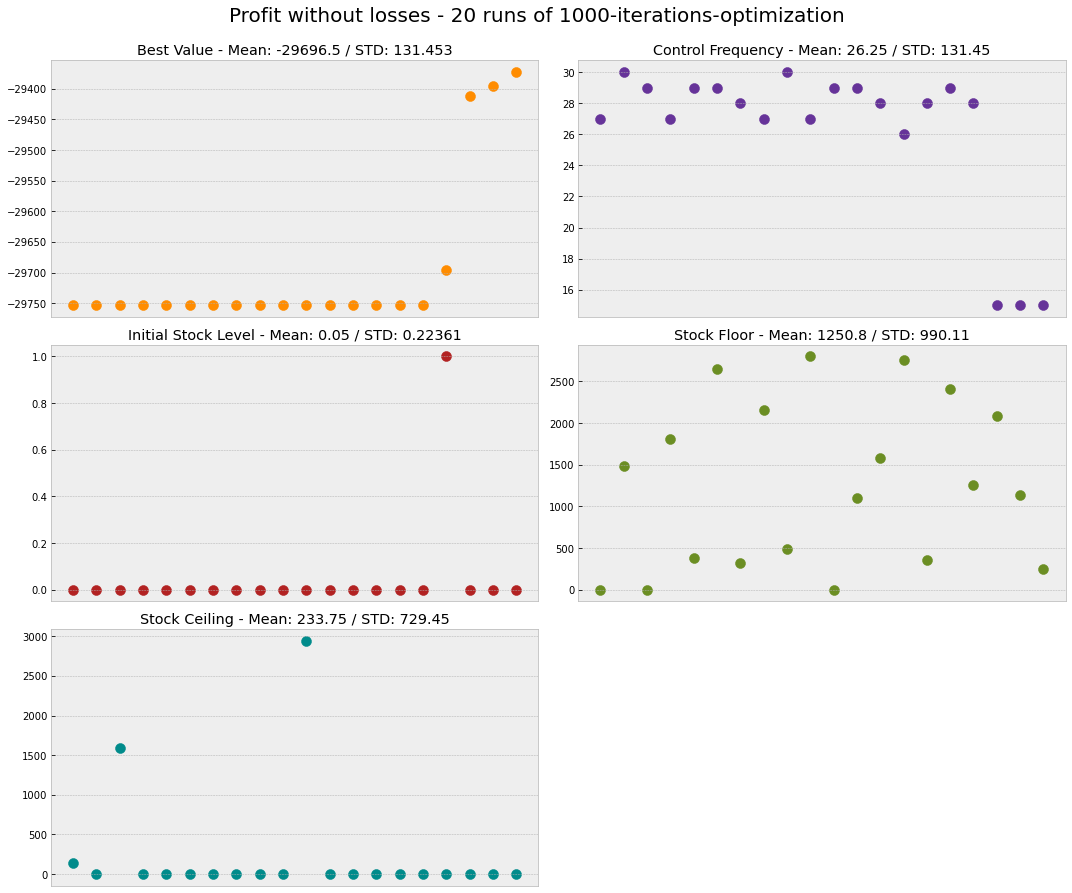

In [10]:
fig, axes = plt.subplots(3,2, figsize=(15,12), sharex=True)

axes[0,0].scatter(df.index, df['Best Value'], marker='o', s=100, color='darkorange')
axes[0,0].set_title(f"Best Value - Mean: {(df['Best Value'].mean()):.6g} / STD: {(df['Best Value'].std()):.6g}")

axes[0,1].scatter(df.index, df['Control Frequency'], marker='o', s=100, color='rebeccapurple')
axes[0,1].set_title(f"Control Frequency - Mean: {(df['Control Frequency'].mean()):.5g} / STD: {(df['Best Value'].std()):.5g}")

axes[1,0].scatter(df.index, df['Initial Stock Level'], marker='o', s=100, color='firebrick')
axes[1,0].set_title(f"Initial Stock Level - Mean: {(df['Initial Stock Level'].mean()):.5g} / STD: {(df['Initial Stock Level'].std()):.5g}")

axes[1,1].scatter(df.index, df['Stock Floor'], marker='o', s=100, color='olivedrab')
axes[1,1].set_title(f"Stock Floor - Mean: {(df['Stock Floor'].mean()):.5g} / STD: {(df['Stock Floor'].std()):.5g}")

axes[2,0].scatter(df.index, df['Stock Ceiling'], marker='o', s=100, color='darkcyan')
axes[2,0].set_title(f"Stock Ceiling - Mean: {(df['Stock Ceiling'].mean()):.5g} / STD: {(df['Stock Ceiling'].std()):.5g}")

fig.delaxes(axes[2,1])
plt.suptitle(f"Profit without losses - {num_opt} runs of {n_trials}-iterations-optimization",
             fontsize=20, y=1.03)
plt.xticks([])
plt.tight_layout()
plt.show()